Project 6 - Review of per State Car Crash Data 

This project will analyze car crash data per state. It will review variables such as speed, alchohol, and the state of the accident. 

The goal is present actionable findings in a easy to understand visuals. 

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np  

Data Acquisition

In [29]:
# Load the Car Crashes dataset into DataFrame
df = sns.load_dataset('car_crashes')

print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


Initial Data Inspection

In [30]:
print(df.columns)  # Print the column names to check their exact names
print(df.head(10))
print(df.shape)
print(df.dtypes)

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      13

Initial Data Descriptive Statistics

In [35]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


Initial Data Distribution of Categorical Columns

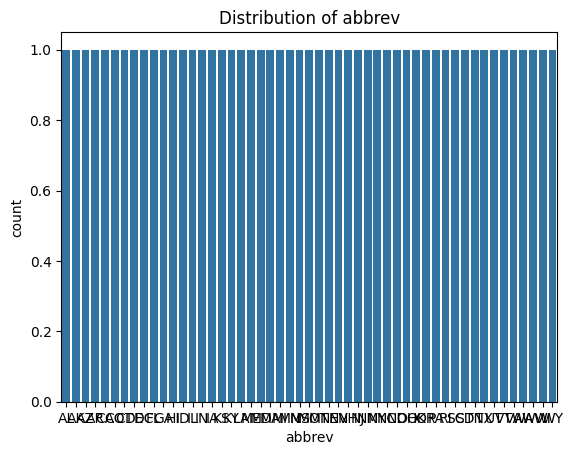

In [46]:
# Inspect value counts by categorical column
df['total'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

Look up Car Crashes by State and Plot

C:\Users\Edgar\AppData\Local\Temp\ipykernel_13836\3334916901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_crashes_sorted, x='abbrev', y='total', palette='viridis')  # Adjust 'abbrev' if needed


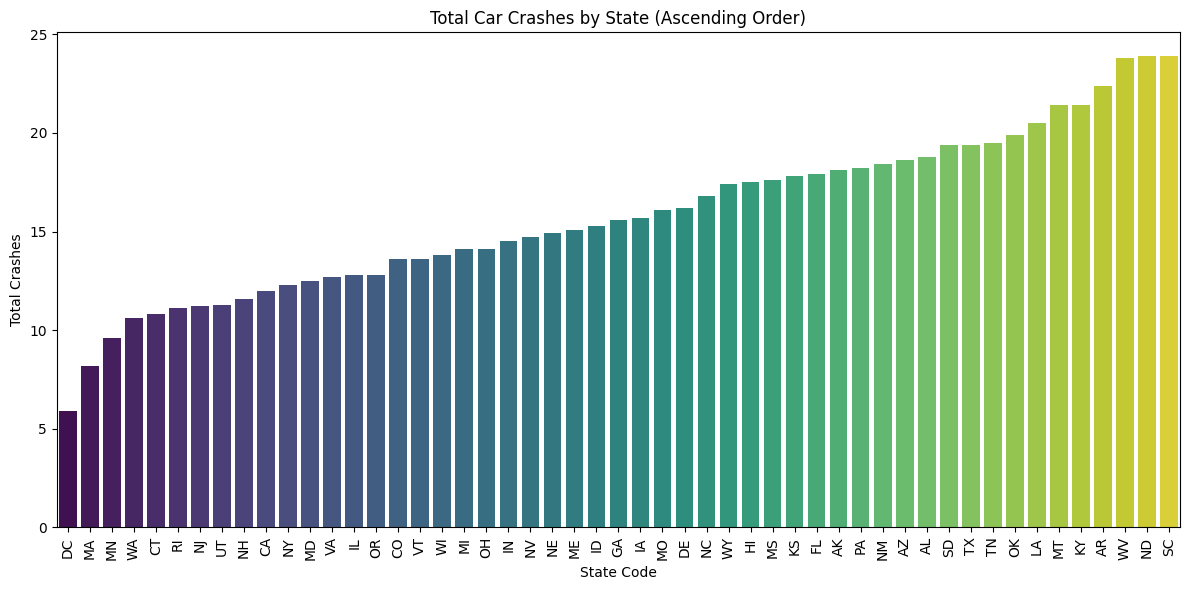

In [47]:
# Group by the correct state-related column (e.g., 'abbrev' or whatever it is)
state_crashes = df.groupby('abbrev')['total'].sum().reset_index()  # Adjust 'abbrev' if needed

# Sort the results in ascending order
state_crashes_sorted = state_crashes.sort_values(by='total')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=state_crashes_sorted, x='abbrev', y='total', palette='viridis')  # Adjust 'abbrev' if needed
plt.title('Total Car Crashes by State (Ascending Order)')
plt.xlabel('State Code')
plt.ylabel('Total Crashes')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

C:\Users\Edgar\AppData\Local\Temp\ipykernel_13836\3344535757.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_premiums_sorted, x='abbrev', y='ins_premium', palette='viridis')


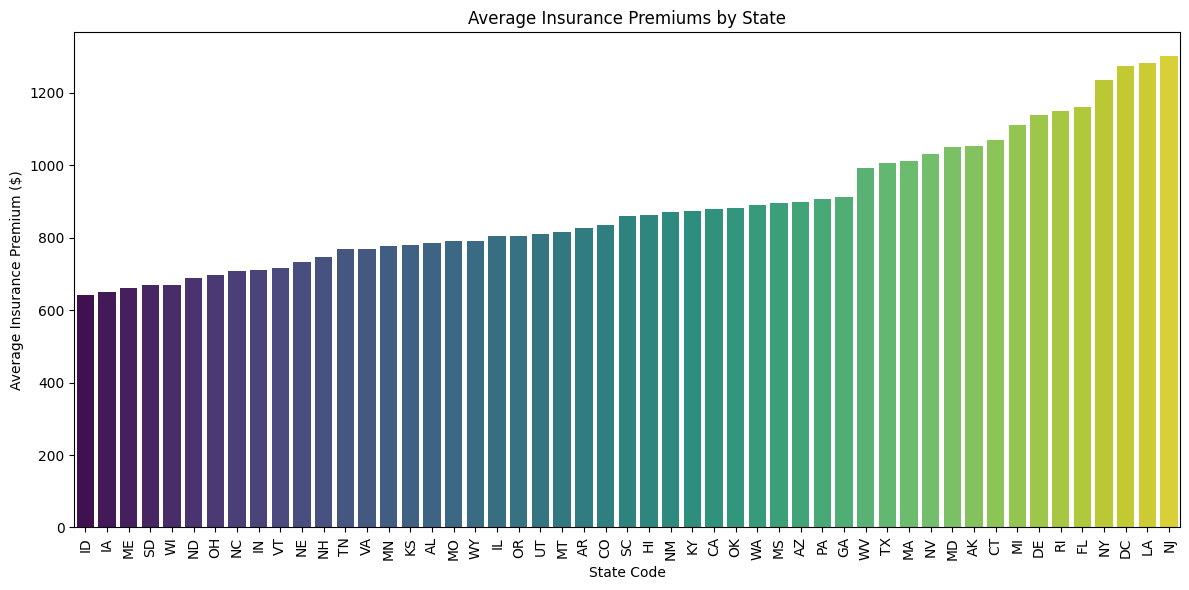

In [48]:
# Group by state abbreviation and calculate the average insurance premium
state_premiums = df.groupby('abbrev')['ins_premium'].mean().reset_index()

# Sort the results in ascending order
state_premiums_sorted = state_premiums.sort_values(by='ins_premium')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=state_premiums_sorted, x='abbrev', y='ins_premium', palette='viridis')
plt.title('Average Insurance Premiums by State')
plt.xlabel('State Code')
plt.ylabel('Average Insurance Premium ($)')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

   abbrev  total_crashes  average_premium
0      AK           18.1          1053.48
1      AL           18.8           784.55
2      AR           22.4           827.34
3      AZ           18.6           899.47
4      CA           12.0           878.41
5      CO           13.6           835.50
6      CT           10.8          1068.73
7      DC            5.9          1273.89
8      DE           16.2          1137.87
9      FL           17.9          1160.13
10     GA           15.6           913.15
11     HI           17.5           861.18
12     IA           15.7           649.06
13     ID           15.3           641.96
14     IL           12.8           803.11
15     IN           14.5           710.46
16     KS           17.8           780.45
17     KY           21.4           872.51
18     LA           20.5          1281.55
19     MA            8.2          1011.14
20     MD           12.5          1048.78
21     ME           15.1           661.88
22     MI           14.1          

C:\Users\Edgar\AppData\Local\Temp\ipykernel_13836\2401638388.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=state_totals, x='total_crashes', y='average_premium', palette='viridis', s=100)


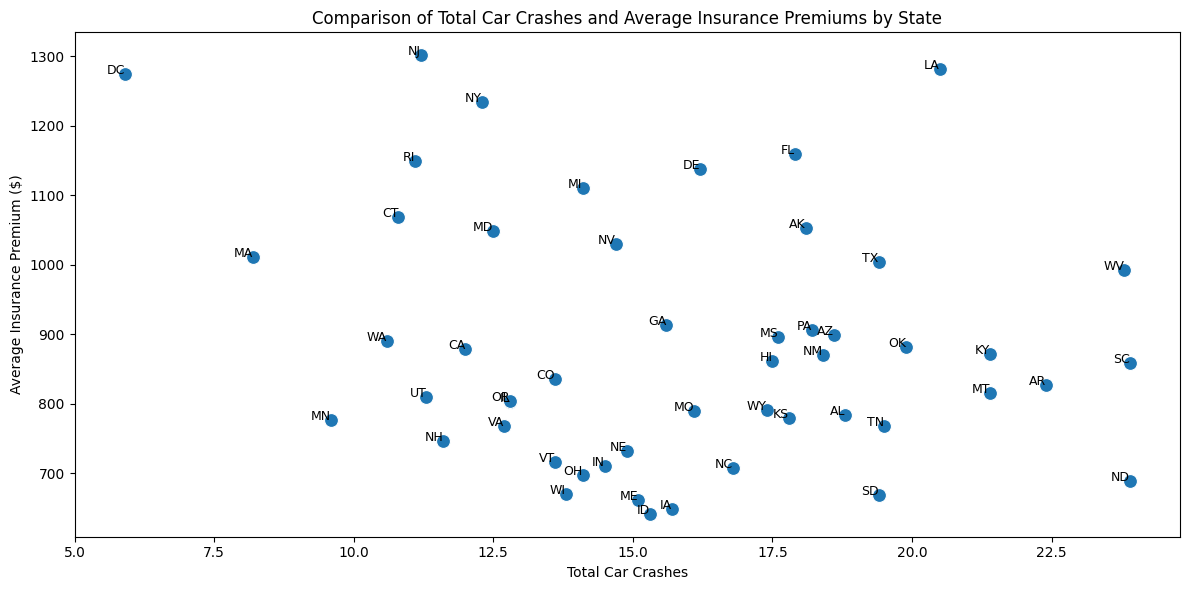

In [49]:
# Group by state abbreviation to calculate total crashes and average insurance premium
state_totals = df.groupby('abbrev').agg(total_crashes=('total', 'sum'), average_premium=('ins_premium', 'mean')).reset_index()

# Display the resulting DataFrame
print(state_totals)

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=state_totals, x='total_crashes', y='average_premium', palette='viridis', s=100)

# Adding titles and labels
plt.title('Comparison of Total Car Crashes and Average Insurance Premiums by State')
plt.xlabel('Total Car Crashes')
plt.ylabel('Average Insurance Premium ($)')

# Annotate each point with the state abbreviation
for i in range(state_totals.shape[0]):
    plt.annotate(state_totals['abbrev'][i],
                 (state_totals['total_crashes'][i], state_totals['average_premium'][i]),
                 fontsize=9,
                 ha='right')

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

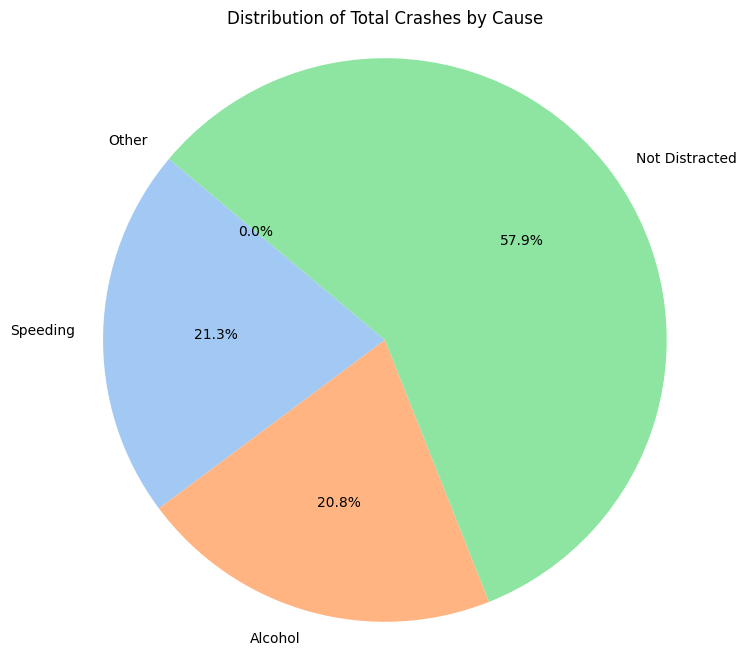

In [50]:
# Calculate the total counts for each cause
total_crashes = df['total'].sum()
total_speeding = df['speeding'].sum()
total_alcohol = df['alcohol'].sum()
total_not_distracted = df['not_distracted'].sum()

# Create a new DataFrame for the pie chart
pie_data = pd.DataFrame({
    'Cause': ['Speeding', 'Alcohol', 'Not Distracted'],
    'Count': [total_speeding, total_alcohol, total_not_distracted]
})

# Calculate the remaining crashes and add as a new row
other_count = total_crashes - (total_speeding + total_alcohol + total_not_distracted)

# Ensure other_count is non-negative
other_count = max(other_count, 0)  # Set to 0 if negative
other_data = pd.DataFrame({'Cause': ['Other'], 'Count': [other_count]})

# Concatenate the DataFrames
pie_data = pd.concat([pie_data, other_data], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data['Count'], labels=pie_data['Cause'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Total Crashes by Cause')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()